# MNIST Digit Classification 

imports


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Train Test Split not required as mnist is already split
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

In [76]:
import cv2
from PIL import Image #

ModuleNotFoundError: No module named 'cv2'

importing dataset

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_train:", X_train[0].shape)
print(X_train[0])         #X_train[i] is a 28×28 grayscale image of a handwritten digit.


Shape of X_train: (60000, 28, 28)
Shape of X_train: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [ 

Text(0.5, 1.0, 'Label: 5')

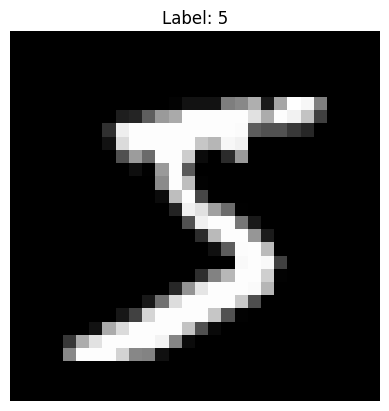

In [7]:
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.title(f"Label: {y_train[0]}")

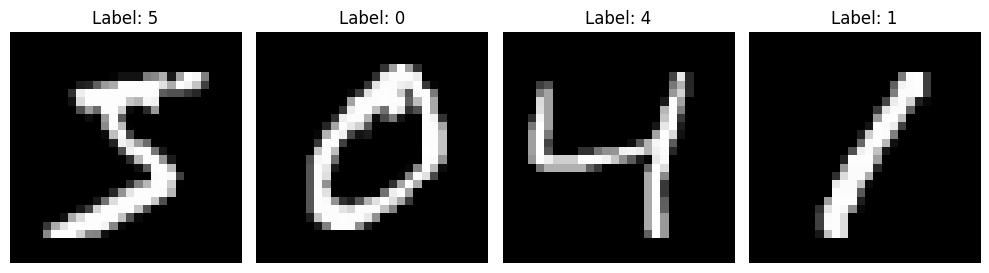

In [8]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='grey')   #Displays the image at index i from X_train
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
np.unique(y_train)  # Displays unique labels in y_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

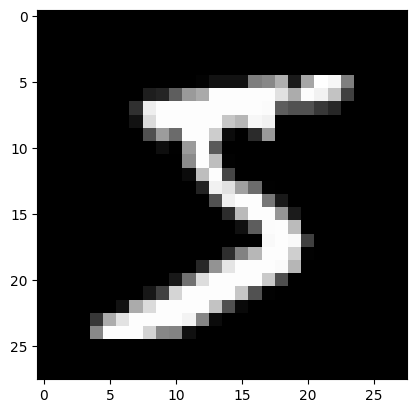

In [11]:
# printing the 1st image

print(X_train[0])
plt.imshow(X_train[0], cmap='gray')

**Building the Neural Network** (ANN and CNN)

Building ANN Model

In [24]:
model = tf.keras.Sequential([
                          tf.keras.layers.Flatten(input_shape=(28,28)),
                          tf.keras.layers.Dense(50, activation='relu'),
                          tf.keras.layers.Dense(50, activation='relu'),
                          tf.keras.layers.Dense(10, activation='sigmoid')
])

In [25]:
# compiling the ANN model

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) #metrics=['accuracy]-> After each training step (batch/epoch), also calculate accuracy, not just loss.

In [26]:
# training the ANN model

history=model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)   #After each batch, the model updates its weights using backpropagation.

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8411 - loss: 0.5549 - val_accuracy: 0.9422 - val_loss: 0.1943
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9515 - loss: 0.1623 - val_accuracy: 0.9563 - val_loss: 0.1478
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9654 - loss: 0.1160 - val_accuracy: 0.9613 - val_loss: 0.1282
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9744 - loss: 0.0898 - val_accuracy: 0.9649 - val_loss: 0.1193
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9795 - loss: 0.0721 - val_accuracy: 0.9654 - val_loss: 0.1191
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9832 - loss: 0.0585 - val_accuracy: 0.9651 - val_loss: 0.1253
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9862 - loss: 0.0474 - val_accuracy: 0.9650 - val_loss: 0.1239
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9888 - loss: 0.

In [20]:
history

In [18]:
print(history.history.keys()) 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


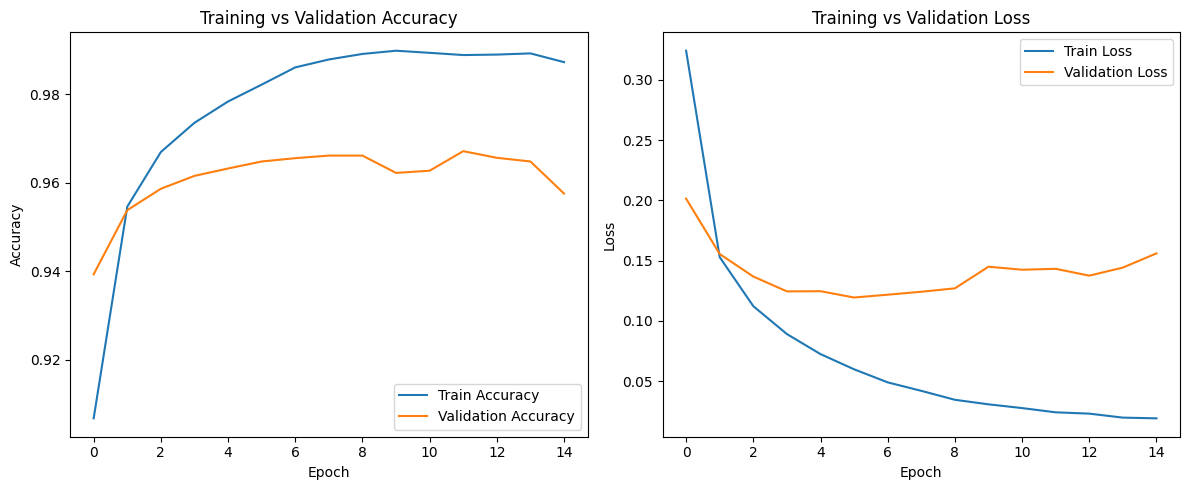

In [16]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Training data accuracy = 99.39%

**Accuracy on Test data:**

In [48]:
loss, accuracy = model.evaluate(X_test, y_test)
print('accuracy=',accuracy)
print('loss=',loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9649 - loss: 0.1591
accuracy= 0.9706000089645386
loss= 0.13926592469215393


Test data accuracy = 97.06%

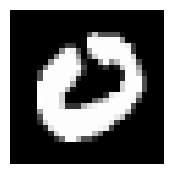

In [39]:
# first data point in X_test
plt.figure(figsize=(2,2))
plt.imshow(X_test[25], cmap='gray')
plt.axis('off')
plt.show()

In [41]:
print(y_test[25])

0


In [52]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [54]:
print(y_pred.shape)

(10000, 10)


In [55]:
print(y_pred[25])

[1.0000000e+00 9.2401899e-11 2.0792212e-04 1.8088067e-10 4.1286475e-03
 3.4079538e-12 8.7136984e-01 3.8594110e-09 3.3300014e-03 9.9407458e-01]


In [56]:
print(f"Pridicted Label: {np.argmax(y_pred[25])}")  #.argmax returns the index of the maximum value in the array
print(f"Actual Label: {y_test[25]}")

Pridicted Label: 0
Actual Label: 0


All predicted labels for test data points

In [57]:
y_pred

array([[5.3351033e-02, 8.8173845e-05, 1.3916153e-01, ..., 1.0000000e+00,
        2.2720444e-01, 9.6581727e-01],
       [9.9191978e-04, 9.9670810e-01, 1.0000000e+00, ..., 5.6749799e-11,
        1.4280922e-03, 3.0697114e-12],
       [3.0883116e-04, 9.9999720e-01, 5.7227898e-02, ..., 9.4038004e-01,
        4.0668812e-02, 5.9857784e-06],
       ...,
       [9.0957193e-11, 1.6355257e-01, 5.6714584e-09, ..., 1.9939534e-01,
        1.0236434e-04, 9.9997240e-01],
       [7.8440207e-01, 1.2582323e-11, 1.5260504e-09, ..., 3.2132760e-01,
        9.9986017e-01, 7.1408747e-12],
       [1.7760763e-02, 4.8059440e-10, 1.8381050e-07, ..., 2.0027317e-06,
        8.0509475e-05, 3.7423530e-04]], dtype=float32)

In [58]:
y_pred_labels = [int(np.argmax(i)) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 1, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion matrix

In [59]:
conf_mat = confusion_matrix(y_test, y_pred_labels)
conf_mat

array([[ 969,    0,    1,    0,    1,    1,    2,    1,    4,    1],
       [   0, 1127,    1,    3,    0,    0,    2,    1,    1,    0],
       [  10,    1,  987,    7,   11,    1,    3,    4,    8,    0],
       [   1,    1,    6,  988,    4,    2,    0,    4,    3,    1],
       [   1,    1,    1,    0,  961,    0,    4,    2,    2,   10],
       [   4,    1,    0,   14,    5,  855,    7,    2,    4,    0],
       [   5,    3,    1,    0,    7,    5,  932,    0,    4,    1],
       [   3,    2,   11,    5,    1,    1,    0,  993,    2,   10],
       [   5,    1,    6,    8,    4,    3,    1,    5,  938,    3],
       [   4,    3,    1,    7,   14,   13,    0,    6,    1,  960]])

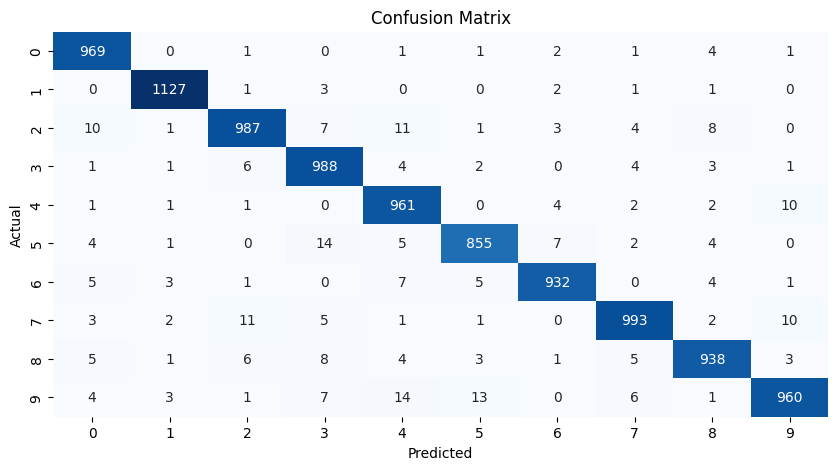

In [73]:
plt.figure(figsize=(10,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues",cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Testing the model on a random single image**

In [75]:
input_image_path = '7.png'